In [9]:
%pylab
%matplotlib inline

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/home/mike/.conda/envs/idp/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Coinflip Problem

First let's see how the distribution evolves for a uniform prior.

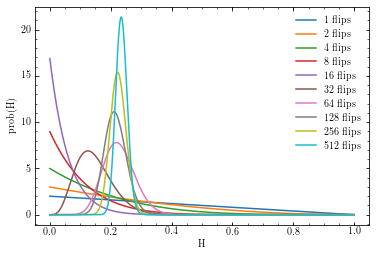

In [13]:
# actual value of H - here we expect to get tails 3 times out of 4

H = 0.25

# simulate the coin toss: true is heads, false is tails

N = 1024
flips = (np.random.rand(N) < H)

nflips = 1 << np.arange(10)

Hgrid = np.linspace(0,1,1000)
prior = np.ones_like(Hgrid)

for n in nflips:
    dist = prior * Hgrid**(flips[:n].sum()) * (1-Hgrid)**(n - flips[:n].sum())
    dist /= dist.sum() / len(Hgrid)
    plt.plot(Hgrid,dist, label="%d flips"%n)

plt.legend()
plt.xlabel("H")
plt.ylabel("prob(H)")
plt.show()

Now let's suppose that we initially have a really strong bias toward a fair coin, but gradually we realize that it ain't so fair as we go

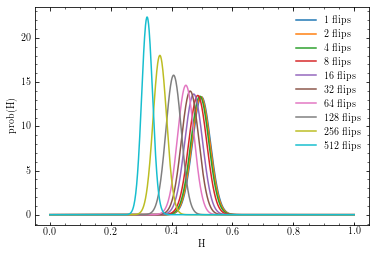

In [16]:
prior = np.exp(-(Hgrid - 0.5)**2/(2*0.03**2))

for n in nflips:
    dist = prior * Hgrid**(flips[:n].sum()) * (1-Hgrid)**(n - flips[:n].sum())
    dist /= dist.sum() / len(Hgrid)
    plt.plot(Hgrid,dist, label="%d flips"%n)

plt.legend()
plt.xlabel("H")
plt.ylabel("prob(H)")
plt.show()

We see that it takes a lot of new information before we start to conclusively believe that H != 5 if we had a bad prior.

# Lighthouse Problem

We'll simulate the lighthouse by sampling the flash angles from a uniform distribution from 0 to Pi. Then the data are where those flashes land, alpha + beta tan(theta)

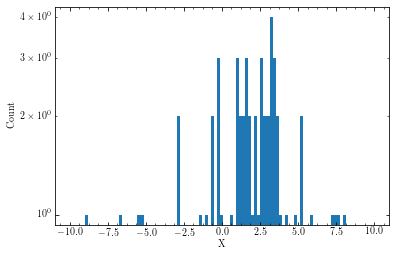

In [66]:
alpha = 2
beta = 2

N = 64
theta = np.random.rand(N)*np.pi

X = alpha + beta * np.tan(theta)

plt.hist(X,np.linspace(-10,10,100))
plt.yscale('log')
plt.xlabel("X")
plt.ylabel("Count")
plt.show()

Now write a function that gives us the likelihood function on the alpha-beta grid, as well as those grids

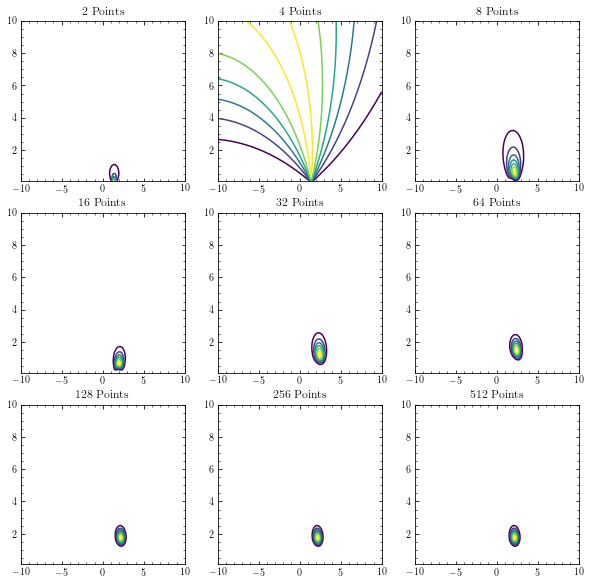

In [78]:
def Cauchy(x, alpha, beta):
    return 1/(1 + ((x - alpha)/beta)**2)/np.pi/beta

def LighthouseLikelihood(X, N=100):
    """Returns 2D grids for alpha, beta, and the likelihood function given a dataset of flashes"""
    alpha = np.linspace(-10, 10, N)
    beta = np.linspace(0.1, 10, N)
    da = alpha[1]-alpha[0]
    db = beta[1]-beta[0]
    alpha, beta = np.meshgrid(alpha, beta)
    
    # We're gonna add up the likelihoods one flash a time, and re-normalize at each step
    likelihood = np.zeros_like(alpha)
    for x in X:
        likelihood += np.log(Cauchy(x,alpha,beta))
        likelihood -= np.log(np.exp(likelihood).sum() * da * db)
    #likelihood = np.sum([np.log(Cauchy(x, alpha, beta)) for x in X], axis=0)
    #likelihood -= likelihood.mean()
    return alpha, beta, likelihood


fig, axes = plt.subplots(3,3,figsize=(10,10))

for i in range(3):
    for j in range(3):
        npoints = 2**(3*i + j + 1)
        alpha, beta, likelihood = LighthouseLikelihood(X[:2**(3*i + j)])
        axes[i,j].contour(alpha, beta, np.exp(likelihood))
        axes[i,j].set_title("%d Points"%npoints)

#alpha, beta, likelihood = LighthouseLikelihood(X[:])
#print(alpha.shape, likelihood.shape)
#plt.contour(alpha, beta, np.exp(likelihood))
plt.show()